<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/Week3/TugasWeek3_Infrared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from math import sqrt

In [8]:
# Load dataset
url = "https://raw.githubusercontent.com/keripikkaneboo/Machine-Learning/refs/heads/main/03.%20Week%203/Infrared.csv"
data = pd.read_csv(url)

# Melihat informasi dataset
print("Informasi Dataset:")
print(data.info())
print("\nLima baris pertama dataset:")
print(data.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   

In [9]:
# Memeriksa nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
print(data.isnull().sum())

# Identifikasi kolom kategorikal dan numerik
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\nKolom kategorikal:", categorical_cols)
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("\nKolom numerik:", numerical_cols)

# Handling kolom kategorikal
data_processed = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Periksa nilai yang hilang setelah encoding
print("\nJumlah nilai yang hilang setelah encoding:")
print(data_processed.isnull().sum())

# Tangani nilai NaN dengan imputer
imputer = SimpleImputer(strategy='mean')
data_imputed = data_processed.copy()
# Pastikan hanya kolom numerik yang diimpute
cols_to_impute = data_imputed.select_dtypes(include=['number']).columns
data_imputed[cols_to_impute] = imputer.fit_transform(data_imputed[cols_to_impute])

# Verifikasi tidak ada lagi nilai NaN
print("\nSetelah imputasi, jumlah nilai yang hilang:")
print(data_imputed.isnull().sum().sum())


Jumlah nilai yang hilang per kolom:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64

Kolom kategorikal: ['Gender', 'Age', 'Ethnicity']

Kolom numerik: ['T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_


Target variabel 'aveOralM' ditemukan dalam dataset.

Jumlah fitur (X): 43
Jumlah sampel: 1020
Distribusi target variabel:
count    1020.000000
mean       37.028382
std         0.509502
min        35.540000
25%        36.777500
50%        36.940000
75%        37.140000
max        40.340000
Name: aveOralM, dtype: float64


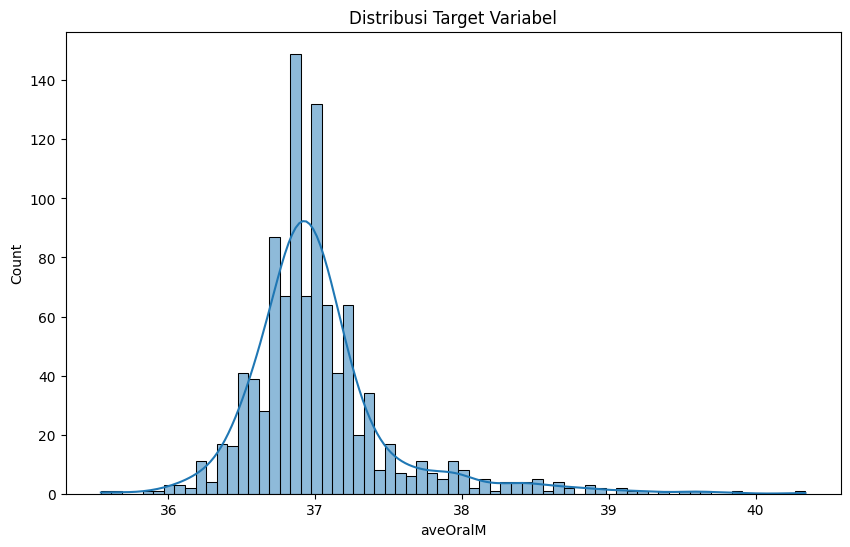

In [11]:
# Periksa jika target variabel ada dalam dataset
if 'aveOralM' not in data_imputed.columns:
    print("\nERROR: Target variabel 'aveOralM' tidak ditemukan dalam dataset.")
    print("Kolom yang tersedia:", data_imputed.columns.tolist())
    # Cari kolom yang mungkin berhubungan dengan target
    potential_targets = [col for col in data_imputed.columns if 'oral' in col.lower()]
    print("Kolom yang mungkin target:", potential_targets)
else:
    print("\nTarget variabel 'aveOralM' ditemukan dalam dataset.")

# PREPROCESSING DATA
# Memisahkan fitur dan target
if 'aveOralM' in data_imputed.columns:
    X = data_imputed.drop('aveOralM', axis=1)
    y = data_imputed['aveOralM']
else:
    # Gunakan kolom pertama dari potential_targets jika ada
    if len(potential_targets) > 0:
        print(f"Menggunakan {potential_targets[0]} sebagai target.")
        X = data_imputed.drop(potential_targets[0], axis=1)
        y = data_imputed[potential_targets[0]]
    else:
        # Jika tidak ada target yang jelas, gunakan kolom numerik terakhir (asumsi)
        target_col = cols_to_impute[-1]
        print(f"WARNING: Target tidak jelas. Menggunakan {target_col} sebagai target.")
        X = data_imputed.drop(target_col, axis=1)
        y = data_imputed[target_col]

# Mencetak informasi fitur dan target
print("\nJumlah fitur (X):", X.shape[1])
print("Jumlah sampel:", X.shape[0])
print("Distribusi target variabel:")
print(y.describe())

# Visualisasi distribusi target variabel
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribusi Target Variabel')
plt.show()

In [12]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menstandarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PEMBUATAN MODEL
# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

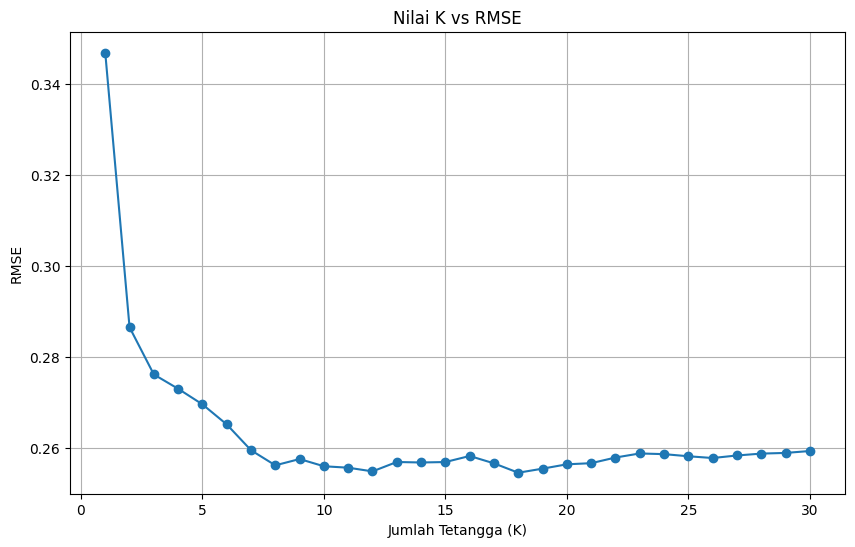


Nilai K optimal: 18

Metrik Evaluasi Model K-NN:
MSE: 0.0648
RMSE: 0.2546
R-squared: 0.6921


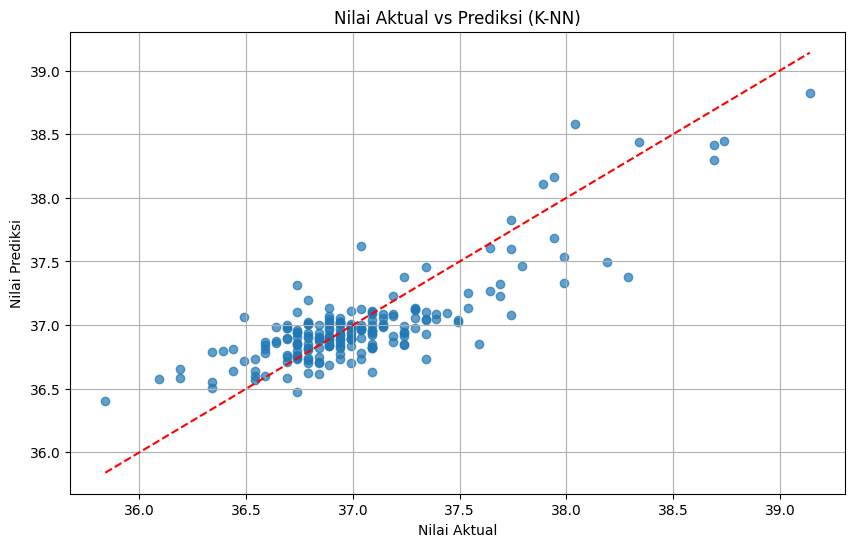

In [13]:
# 1. MODEL K-NN
# Mencari nilai K optimal
k_values = list(range(1, 31))
rmse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Visualisasi nilai K vs RMSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, marker='o')
plt.title('Nilai K vs RMSE')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# Mendapatkan nilai K optimal
optimal_k = k_values[rmse_scores.index(min(rmse_scores))]
print(f"\nNilai K optimal: {optimal_k}")

# Membuat model K-NN final dengan nilai K optimal
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)
y_pred_knn = knn_optimal.predict(X_test_scaled)

# Evaluasi model K-NN
knn_metrics = evaluate_model(y_test, y_pred_knn)
print("\nMetrik Evaluasi Model K-NN:")
for metric, value in knn_metrics.items():
    print(f"{metric}: {value:.4f}")

# Visualisasi hasil prediksi K-NN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Nilai Aktual vs Prediksi (K-NN)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.grid(True)
plt.show()


Parameter optimal untuk Decision Tree:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}

Metrik Evaluasi Model Decision Tree:
MSE: 0.0808
RMSE: 0.2842
R-squared: 0.6165


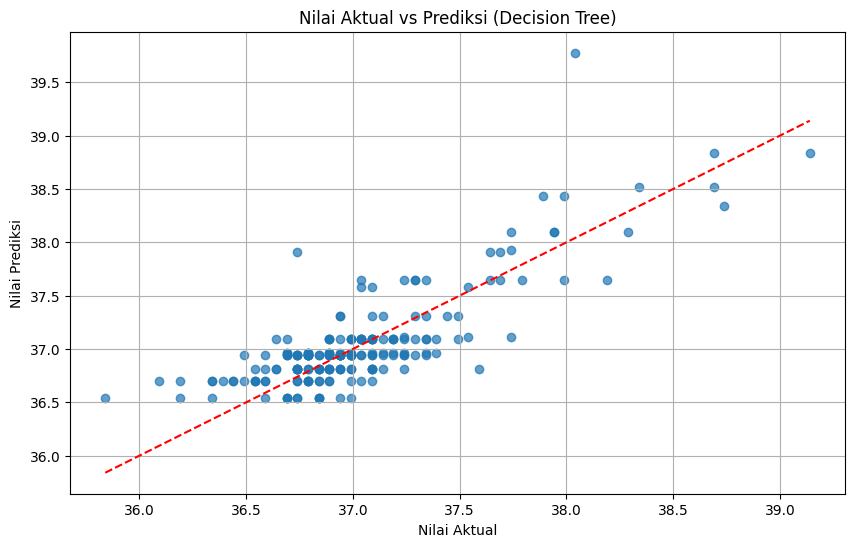

In [14]:
# 2. MODEL DECISION TREE
# Mencari parameter optimal untuk Decision Tree
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Parameter optimal
print("\nParameter optimal untuk Decision Tree:")
print(grid_search.best_params_)

# Membuat model Decision Tree final dengan parameter optimal
dt_optimal = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
dt_optimal.fit(X_train_scaled, y_train)
y_pred_dt = dt_optimal.predict(X_test_scaled)

# Evaluasi model Decision Tree
dt_metrics = evaluate_model(y_test, y_pred_dt)
print("\nMetrik Evaluasi Model Decision Tree:")
for metric, value in dt_metrics.items():
    print(f"{metric}: {value:.4f}")

# Visualisasi hasil prediksi Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Nilai Aktual vs Prediksi (Decision Tree)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.grid(True)
plt.show()

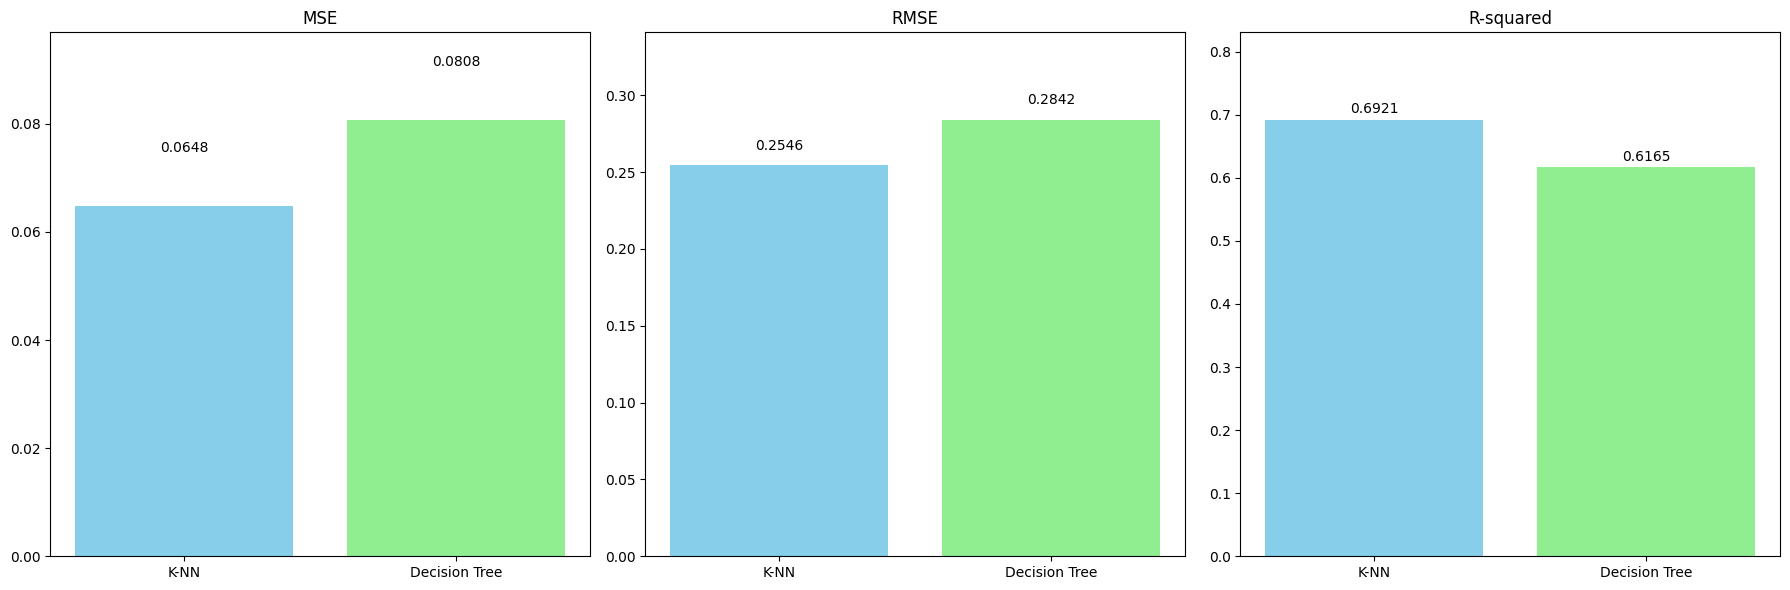

In [15]:
# 3. PERBANDINGAN MODEL
# Membandingkan metrik evaluasi dari kedua model
models = ['K-NN', 'Decision Tree']
mse_values = [knn_metrics['MSE'], dt_metrics['MSE']]
rmse_values = [knn_metrics['RMSE'], dt_metrics['RMSE']]
r2_values = [knn_metrics['R-squared'], dt_metrics['R-squared']]

# Visualisasi perbandingan metrik
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(models, mse_values, color=['skyblue', 'lightgreen'])
axes[0].set_title('MSE')
axes[0].set_ylim(0, max(mse_values) * 1.2)
for i, v in enumerate(mse_values):
    axes[0].text(i, v + 0.01, f"{v:.4f}", ha='center')

axes[1].bar(models, rmse_values, color=['skyblue', 'lightgreen'])
axes[1].set_title('RMSE')
axes[1].set_ylim(0, max(rmse_values) * 1.2)
for i, v in enumerate(rmse_values):
    axes[1].text(i, v + 0.01, f"{v:.4f}", ha='center')

axes[2].bar(models, r2_values, color=['skyblue', 'lightgreen'])
axes[2].set_title('R-squared')
axes[2].set_ylim(0, max(r2_values) * 1.2)
for i, v in enumerate(r2_values):
    axes[2].text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

In [16]:
# Merekomendasikan model terbaik
print("\nPerbandingan Model:")
print(f"1. K-NN (K={optimal_k})")
print(f"   MSE: {knn_metrics['MSE']:.4f}, RMSE: {knn_metrics['RMSE']:.4f}, R-squared: {knn_metrics['R-squared']:.4f}")
print(f"2. Decision Tree (Parameter: {grid_search.best_params_})")
print(f"   MSE: {dt_metrics['MSE']:.4f}, RMSE: {dt_metrics['RMSE']:.4f}, R-squared: {dt_metrics['R-squared']:.4f}")

if knn_metrics['RMSE'] < dt_metrics['RMSE']:
    print("\nRekomendasi: Model K-NN lebih baik karena memiliki RMSE lebih rendah dan R-squared lebih tinggi.")
else:
    print("\nRekomendasi: Model Decision Tree lebih baik karena memiliki RMSE lebih rendah dan R-squared lebih tinggi.")



Perbandingan Model:
1. K-NN (K=18)
   MSE: 0.0648, RMSE: 0.2546, R-squared: 0.6921
2. Decision Tree (Parameter: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10})
   MSE: 0.0808, RMSE: 0.2842, R-squared: 0.6165

Rekomendasi: Model K-NN lebih baik karena memiliki RMSE lebih rendah dan R-squared lebih tinggi.


### 1. MSE (Mean Squared Error)

**Persamaan matematika**:
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Penjelasan**:
- $n$ adalah jumlah total data yang diprediksi
- $y_i$ adalah nilai aktual dari data ke-$i$
- $\hat{y}_i$ adalah nilai prediksi dari data ke-$i$
- Langkah perhitungan:
  1. Hitung selisih antara nilai aktual dan nilai prediksi untuk setiap data: $(y_i - \hat{y}_i)$
  2. Kuadratkan selisih tersebut: $(y_i - \hat{y}_i)^2$
  3. Jumlahkan semua nilai kuadrat selisih: $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
  4. Bagi dengan jumlah data ($n$) untuk mendapatkan rata-rata

MSE selalu bernilai positif. Semakin kecil nilainya, semakin baik model dalam memprediksi. Pengkuadratan selisih menyebabkan error yang besar mendapat penalti yang lebih besar.

### 2. RMSE (Root Mean Squared Error)

**Persamaan matematika**:
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{MSE}$$

**Penjelasan**:
- RMSE adalah akar kuadrat dari MSE
- Langkah perhitungan:
  1. Hitung nilai MSE seperti pada persamaan sebelumnya
  2. Ambil akar kuadrat dari nilai MSE tersebut

RMSE memiliki satuan yang sama dengan variabel target, sehingga lebih mudah diinterpretasikan daripada MSE. Seperti MSE, nilai RMSE yang lebih kecil menunjukkan model yang lebih baik dalam memprediksi.

### 3. R-squared (Koefisien Determinasi)

**Persamaan matematika**:
$$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

**Penjelasan**:
- $SSE$ (Sum of Squared Errors): Jumlah kuadrat selisih antara nilai aktual dan nilai prediksi
- $SST$ (Total Sum of Squares): Jumlah kuadrat selisih antara nilai aktual dan nilai rata-rata aktual
- $\bar{y}$ adalah nilai rata-rata dari semua nilai aktual: $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$
- Langkah perhitungan:
  1. Hitung rata-rata dari nilai aktual: $\bar{y}$
  2. Hitung SSE: $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
  3. Hitung SST: $\sum_{i=1}^{n} (y_i - \bar{y})^2$
  4. Hitung R²: $1 - \frac{SSE}{SST}$

R² mengukur seberapa baik model dapat menjelaskan variasi dalam data. Nilai R² berkisar antara 0 dan 1:
- R² = 1: Model menjelaskan 100% variasi dalam data (model sempurna)
- R² = 0: Model tidak menjelaskan variasi data sama sekali (setara dengan memprediksi rata-rata)
- R² < 0: Model lebih buruk daripada hanya memprediksi nilai rata-rata (jarang terjadi)
